In [1]:
import pandas as pd
from ta import *
snp = pd.read_csv('S&P500_Data_Daily.csv')
dow = pd.read_csv('Dow_Jones_Data_Daily.csv')
nas = pd.read_csv('NASDAQ_Data_Daily.csv')

Sofia Lange 11:40 AM

VOLATILITY: - Sofie

Bollinger Bands, ATR

TREND: - Sofie

MACD, Ichimoku Kinkō Hyō

MOMENTUM: - Shelby

RSI, Stochastic

VOLUME: - Shelby

OBV,CMF (edited) 

In [2]:
snp_df = add_all_ta_features(snp, "Open", "High", "Low", "Close", "Volume", fillna=True)
dow_df = add_all_ta_features(dow, "Open", "High", "Low", "Close", "Volume", fillna=True)
nas_df = add_all_ta_features(nas, "Open", "High", "Low", "Close", "Volume", fillna=True)

/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ta/trend.py:543: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ta/trend.py:547: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


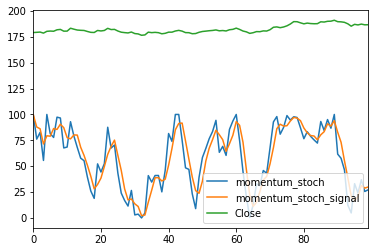

In [5]:
import matplotlib.pyplot as plt
snp_df[['momentum_stoch','momentum_stoch_signal','Close']].head(100).plot()
plt.show()

In [3]:
snp_df['momentum_rsi'].head(100)

0      50.000000
1     100.000000
2     100.000000
3      28.771850
4      69.289809
         ...    
95     50.404478
96     48.216458
97     51.442196
98     48.585288
99     49.014740
Name: momentum_rsi, Length: 100, dtype: float64

In [4]:
drop_labels = ['trend_visual_ichimoku_a','trend_visual_ichimoku_b', 
               'trend_aroon_up', 'trend_aroon_down','trend_aroon_ind', 
               'momentum_rsi', 'momentum_mfi', 'momentum_tsi',
               'momentum_uo', 'momentum_stoch', 'momentum_stoch_signal', 
               'momentum_wr','momentum_ao', 
               'volatility_dch','volatility_dcl', 'volatility_dchi', 'volatility_dcli',
               'others_dr', 'others_dlr', 'others_cr',
               'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 
               'volume_em','volume_vpt', 'volume_nvi', 'volatility_atr',
               'trend_ema_fast','trend_ema_slow', 'trend_adx', 
               'trend_adx_pos', 'trend_adx_neg','trend_vortex_ind_pos', 
               'trend_vortex_ind_neg', 'trend_vortex_diff',
               'trend_trix', 'trend_mass_index', 'trend_cci', 
               'trend_dpo', 'trend_kst','trend_kst_sig', 'trend_kst_diff']

snp_df = snp_df.drop(drop_labels, axis = 1)
dow_df = dow_df.drop(drop_labels, axis = 1)
nas_df = nas_df.drop(drop_labels, axis = 1)

In [4]:
snp_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'volatility_bbh', 'volatility_bbl', 'volatility_bbm', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kchi', 'volatility_kcli', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_ichimoku_a', 'trend_ichimoku_b'],
      dtype='object')

In [21]:
def keltner_label(df):
    keltner_indicator_buy = df.apply(lambda row : row.Close > row.volatility_kch, axis = 1)
    keltner_indicator_buy = keltner_indicator_buy.map({True:1,False:0})
    keltner_indicator_sell = df.apply(lambda row : row.Close < row.volatility_kcl, axis = 1)
    keltner_indicator_sell = keltner_indicator_sell.map({True:-1,False:0})
    keltner_indicator = np.sum([keltner_indicator_buy, keltner_indicator_sell],axis=0)
    return keltner_indicator

In [22]:
snp_df['keltner_indicator'] = keltner_label(snp_df)
dow_df['keltner_indicator'] = keltner_label(dow_df)
nas_df['keltner_indicator'] = keltner_label(nas_df)

In [7]:
label_bbands = lambda x: x.volatility_bbhi + -1*x.volatility_bbli

In [8]:
snp_df['bbands_indicator'] = snp_df.apply(label_bbands, axis =1)
dow_df['bbands_indicator'] = dow_df.apply(label_bbands, axis =1)
nas_df['bbands_indicator'] = nas_df.apply(label_bbands, axis =1)

In [9]:
def cross_over(diff_column):
    df = pd.DataFrame()
    prev_diff = diff_column.shift(1)
    df['prev_diff'] = prev_diff
    df['diff_column'] = diff_column
    line = 0
    def f(row):
        if ((row.diff_column > line) & (row.prev_diff < line)): 
             return 1
        elif ((row.prev_diff > line) & (row.diff_column < line)):
            return -1
        else: 
            return 0
    cross = df.apply(f, axis = 1)
    return cross

def ichimoku_label(df):
    ichimoku_diff = df.apply(lambda x : x.trend_ichimoku_a - x.trend_ichimoku_b, axis = 1)
    return cross_over(ichimoku_diff)

def macd_label(df):
    return cross_over(df['trend_macd_diff'])

In [10]:
snp_df['ichimoku_label'] = ichimoku_label(snp_df)
dow_df['ichimoku_label'] = ichimoku_label(dow_df)
nas_df['ichimoku_label'] = ichimoku_label(nas_df)

In [11]:
snp_df['macd_indicator'] = macd_label(snp_df)
dow_df['macd_indicator'] = macd_label(dow_df)
nas_df['macd_indicator'] = macd_label(nas_df)

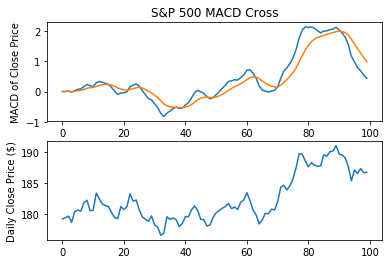

In [21]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.subplot(211)
plt.title('S&P 500 MACD Cross')
plt.plot(range(100), snp_df.trend_macd.head(100))
plt.plot(range(100), snp_df.trend_macd_signal.head(100))
plt.ylabel('MACD of Close Price')
plt.subplot(212)
plt.plot(range(100), snp_df.Close.head(100))
plt.ylabel('Daily Close Price ($)')
plt.savefig('MACD.png')
plt.show()


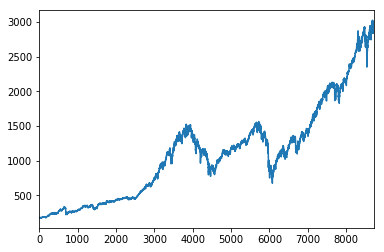

In [71]:
snp_df.Close.plot()

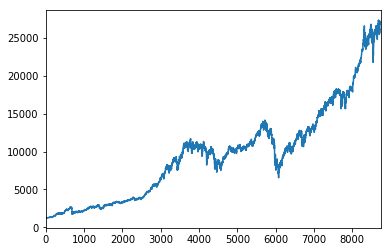

In [73]:
dow_df.Close.plot()

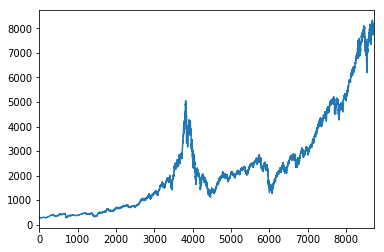

In [74]:
nas_df.Close.plot()

In [13]:
snp_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'volatility_bbh', 'volatility_bbl', 'volatility_bbm', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kchi', 'volatility_kcli', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_ichimoku_a', 'trend_ichimoku_b',
       'keltner_indicator', 'bbands_indicator', 'ichimoku_label',
       'macd_indicator'],
      dtype='object')

In [22]:
!pip install sklearn

  Using cached https://files.pythonhosted.org/packages/1e/7a/dbb3be0ce9bd5c8b7e3d87328e79063f8b263b2b1bfa4774cb1147bfcd3f/sklearn-0.0.tar.gz
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /Users/sofielange98/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [30]:
X = snp_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator']]
snp_df['label'] = np.random.randint(0,2,len(snp_df))
y = snp_df['label']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [31]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [32]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.5052631578947369

In [34]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,721,386
True Survival,695,383


In [37]:
tree.export_graphviz(model, out_file='tree.dot', feature_names=X.columns)

In [40]:
# from subprocess import call
# !pip install pydot
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
!pip3 install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('tree.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

/bin/sh: pip3: command not found


ModuleNotFoundError: No module named 'pygraphviz'

In [2]:
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('somefile.png')

FileNotFoundError: [Errno 2] "dot" not found in path.